# Introduction 

This article will introduce more linear algebra concepts with the main focus on how these concepts are applied for dimensionality reduction, specially Principal Component Analysis (PCA).

**When to use PCA?**

High-dimensional data is a common issue experienced in machine learning practices, as we typically feed a large amount of features for model training. This results in the caveat of models having less interpretability and higher complexity — also known as the curse of dimensionality.
PCA can be beneficial when the dataset is high-dimensional (i.e. contains many features) and it is widely applied for dimensionality reduction.
If you would like to practice these transformations in python and skip the manual calculations, we can use following code to perform these dot products and visualize the result of the transformation using `plt.quiver()` function.

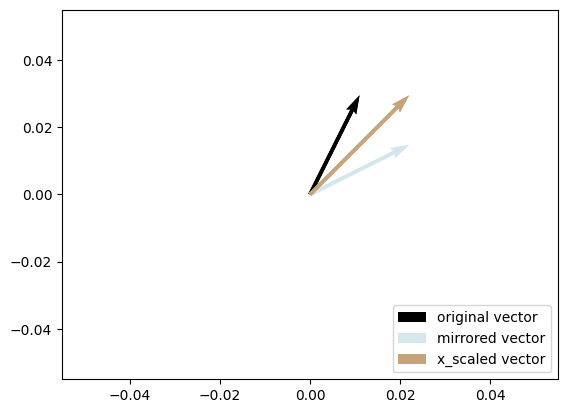

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# define matrices and vector
x_scaled_matrix = np.array([[2,0],[0,1]])
mirror_matrix = np.array([[0,1],[1,0]])
v = np.array([1,2])
# matrix transformation
mirrored_v = mirror_matrix.dot(v)
x_scaled_v = x_scaled_matrix.dot(v)
# plot transformed vectors
origin = np.array([[0, 0], [0, 0]])
plt.quiver(*origin, v[0], v[1], color=['black'],scale=10, label='original vector')
plt.quiver(*origin, mirrored_v[0], mirrored_v[1] , color=['#D3E7EE'], scale=10, label='mirrored vector' )
plt.quiver(*origin, x_scaled_v[0], x_scaled_v[1] , color=['#C6A477'], scale=10, label='x_scaled vector')
plt.legend(loc ="lower right")

**Covariance matrix**

Covariance matrix is another critical concept in PCA process that represents the data variance in the dataset. To understand the details of covariance matrix, we firstly need to know that covariance measures the magnitude of how one random variable varies with another random variable. For two random variable x and y, their covariance is formulated as below and higher covariance value indicates stronger correlation between two variables.

When given a set of variables (e.g. x1, x2, … xn) in a dataset, covariance matrix is used for representing the covariance value between each variable pairs in a matrix format.

Multiplying any vector with the covariance matrix will transform it towards the direction that captures the trend of variance in the original dataset.

In [2]:
# generate random variables x0 and x1
import random
x0 = [round(random.uniform(-1, 1),2) for i in range(0,100)]
x1 = [round(2 * i + random.uniform(-1, 1) ,2) for i in x0]

# compute covariance matrix
X = np.stack((x0, x1), axis=0)
covariance_matrix = np.cov(X)
print('covariance matrix\n', covariance_matrix)

covariance matrix
 [[0.36472844 0.74003887]
 [0.74003887 1.8310964 ]]


We then transform some random vectors by taking the dot product between each of them and the covariance matrix.

(-2.5, 2.5)

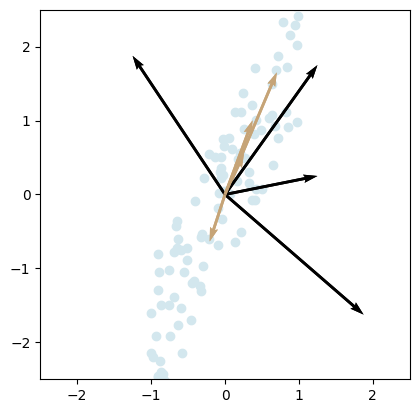

In [3]:
# plot original data points
plt.scatter(x0, x1, color=['#D3E7EE'])

# vectors before transformation
v_original = [np.array([[1,0.2]]), np.array([[-1,1.5]]), np.array([[1.5,-1.3]]), np.array([[1,1.4]])]

# vectors after transformation
for v in v_original:
    v_transformed = v.dot(covariance_matrix)
    origin = np.array([[0, 0], [0, 0]])
    plt.quiver(*origin, v[:, 0], v[:, 1], color=['black'], scale=4)
    plt.quiver(*origin, v_transformed[:, 0], v_transformed[:, 1] , color=['#C6A477'], scale=10)

# plot formatting
plt.axis('scaled')   
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])

# Credit:


https://towardsdatascience.com/a-visual-learners-guide-to-explain-implement-and-interpret-principal-component-analysis-cc9b345b75be